<a href="https://colab.research.google.com/github/soham-joshi/Text_Classification_LSTM/blob/main/text_classification_AV_hack_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk==3.4.5
import tensorflow as tf
import numpy as np
import pandas as pd
import statistics
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
print(tf.__version__)

     |████████████████████████████████| 1.5MB 3.5MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449908 sha256=a11537e7ad434922904f13815608e745b6dd31cfb357a63975ed1b60f7c42aea
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
2.3.0


In [ ]:
train_col_names = ['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']
train_data = pd.read_csv('/tmp/train.csv', names=train_col_names, skiprows=1)
train_data.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [ ]:
train_data.tail()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0
20971,20972,Why optional stopping is a problem for Bayesians,"Recently, optional stopping has been a subje...",0,0,1,1,0,0


In [ ]:
train_ids = train_data.ID.tolist()
train_titles = train_data.TITLE.tolist()
train_abstracts = train_data.ABSTRACT.tolist()

In [ ]:
train_labels = train_data[['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']].values.tolist()
print(train_labels)

[[1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 1, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [1, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0],

In [ ]:
print(train_titles[:5])

['Reconstructing Subject-Specific Effect Maps', 'Rotation Invariance Neural Network', 'Spherical polyharmonics and Poisson kernels for polyharmonic functions', 'A finite element approximation for the stochastic Maxwell--Landau--Lifshitz--Gilbert system', 'Comparative study of Discrete Wavelet Transforms and Wavelet Tensor Train decomposition to feature extraction of FTIR data of medicinal plants']


In [ ]:
test_col_names = ['ID', 'TITLE', 'ABSTRACT']
test_data = pd.read_csv('/tmp/test.csv', names=test_col_names, skiprows=1)
test_data.head()

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [ ]:
test_ids = test_data.ID.tolist()
test_titles = test_data.TITLE.tolist()
test_abstracts = test_data.ABSTRACT.tolist()
print(test_titles[:5])
print(test_abstracts[:5])


['Closed-form Marginal Likelihood in Gamma-Poisson Matrix Factorization', 'Laboratory mid-IR spectra of equilibrated and igneous meteorites. Searching for observables of planetesimal debris', 'Case For Static AMSDU Aggregation in WLANs', 'The $Gaia$-ESO Survey: the inner disk intermediate-age open cluster NGC 6802', 'Witness-Functions versus Interpretation-Functions for Secrecy in Cryptographic Protocols: What to Choose?']
['  We present novel understandings of the Gamma-Poisson (GaP) model, a\nprobabilistic matrix factorization model for count data. We show that GaP can\nbe rewritten free of the score/activation matrix. This gives us new insights\nabout the estimation of the topic/dictionary matrix by maximum marginal\nlikelihood estimation. In particular, this explains the robustness of this\nestimator to over-specified values of the factorization rank, especially its\nability to automatically prune irrelevant dictionary columns, as empirically\nobserved in previous work. The margina

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()




def clean_stemm_stopwords(input_list):
  filtered_op = []
  
  for sample in input_list:
    temp_sample = ''
    words_in_temp_sample = sample.split()
    for word in words_in_temp_sample:
      if not word in stop_words:
        temp_word = ps.stem(word)
        temp_sample += (temp_word + ' ')
    filtered_op.append(temp_sample)

  return filtered_op

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_titles_filtered = clean_stemm_stopwords(train_titles)
train_abstracts_filtered = clean_stemm_stopwords(train_abstracts)

test_titles_filtered = clean_stemm_stopwords(test_titles)
test_abstracts_filtered = clean_stemm_stopwords(test_abstracts)



In [ ]:
print(train_titles_filtered[:5])
print(train_abstracts_filtered[:1])

print(test_titles_filtered[:5])
print(test_abstracts_filtered[:1])

['reconstruct subject-specif effect map ', 'rotat invari neural network ', 'spheric polyharmon poisson kernel polyharmon function ', 'A finit element approxim stochast maxwell--landau--lifshitz--gilbert system ', 'compar studi discret wavelet transform wavelet tensor train decomposit featur extract ftir data medicin plant ']
["predict model allow subject-specif infer analyz diseas relat alter neuroimag data. given subject' data, infer made two levels: global, i.e. identifiy condit presenc subject, local, i.e. detect condit effect individu measur extract subject' data. while global infer wide used, local inference, use form subject-specif effect maps, rare use exist model often yield noisi detect compos dispers isol islands. In article, propos reconstruct method, name rsm, improv subject-specif detect predict model approach particular, binari classifiers. rsm specif aim reduc nois due sampl error associ use finit sampl exampl train classifiers. the propos method wrapper-typ algorithm us

In [ ]:
vocab_size = 16300
embedding_dim = 128
max_length = 300
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = len(train_ids)

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_titles_filtered)
word_index = tokenizer.word_index


In [ ]:
len(word_index)

16347

In [ ]:
training_titles_sequences = tokenizer.texts_to_sequences(train_titles_filtered)
training_titles_padded = pad_sequences(training_titles_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_titles_sequences = tokenizer.texts_to_sequences(test_titles_filtered)
testing_titles_padded = pad_sequences(testing_titles_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
training_abstracts_sequences = tokenizer.texts_to_sequences(train_abstracts_filtered)
training_abstracts_padded = pad_sequences(training_abstracts_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_abstracts_sequences = tokenizer.texts_to_sequences(test_abstracts_filtered)
testing_abstracts_padded = pad_sequences(testing_abstracts_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
print(training_abstracts_padded[:5])

[[  44    3 6675 ...    0    0    0]
 [ 512  161  526 ...    0    0    0]
 [2801 2434  430 ...    0    0    0]
 [   7   52 1096 ...    0    0    0]
 [ 656  178    1 ...    0    0    0]]


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(40, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 128)          2086400   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 300, 80)           54080     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 48)                20160     
_________________________________________________________________
dropout_1 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                980       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 126       
Total params: 2,161,746
Trainable params: 2,161,746
Non-trainable params: 0
____________________________________________

In [ ]:
num_epochs = 5
training_padded = np.array(training_abstracts_padded)
training_labels = np.array(train_labels)


In [ ]:
history = model.fit(training_padded, training_labels, epochs=num_epochs, verbose =1)

Epoch 1/5
656/656 [==============================] - 152s 232ms/step - loss: 0.0653 - accuracy: 0.8504
Epoch 2/5
656/656 [==============================] - 152s 231ms/step - loss: 0.0564 - accuracy: 0.8531
Epoch 3/5
656/656 [==============================] - 152s 231ms/step - loss: 0.0506 - accuracy: 0.8571
Epoch 4/5
656/656 [==============================] - 152s 232ms/step - loss: 0.0460 - accuracy: 0.8611
Epoch 5/5
656/656 [==============================] - 151s 231ms/step - loss: 0.0399 - accuracy: 0.8684


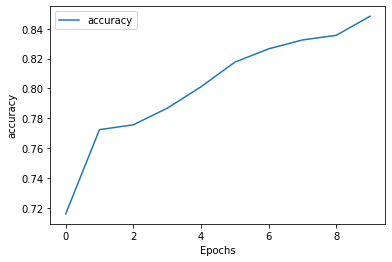

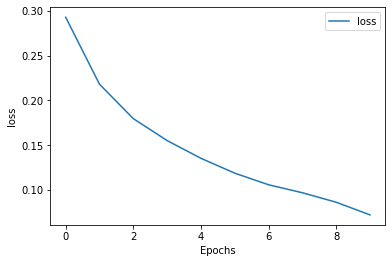

In [ ]:

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  #plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:

predictions = model.predict(np.array(testing_abstracts_padded))

In [ ]:
predictions = np.round(predictions,0)
# for i in range(5):
  # print(test_ids[i],test_abstracts[i],test_titles[i],predictions[i])
output_lists = [[] for i in range(6)]
for res in predictions:
  for i in range(6):
    output_lists[i].append(int(res[i]))


In [ ]:
df = pd.DataFrame({"ID":test_ids,"Computer Science":output_lists[0],"Physics":output_lists[1],
                   "Mathematics":output_lists[2],"Statistics":output_lists[3],
                   "Quantitative Biology":output_lists[4],"Quantitative Finance":output_lists[5]})
df.to_csv("/tmp/results.csv",index=False)